In [1]:
import numpy as np
import cv2

In [2]:
input = cv2.imread('C:/Users/pasindu/OneDrive/Pictures/vijju.png')
cv2.imshow('hello',input)
cv2.waitKey(0)
#Pictures
cv2.destroyAllWindows()

In [3]:
#it carrier fair..
#C:\Users\pasindu\Music\it
input = cv2.imread('C:/Users/pasindu/Music/it/2.jpeg')
cv2.imshow('hello',input)
dim = (853,1280)
resized = cv2.resize(input, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('C:/Users/pasindu/Music/it/2setted.jpeg', resized)
cv2.imshow('hi',resized)
cv2.waitKey(0)
#Pictures
cv2.destroyAllWindows()

In [4]:
#it carrier fair..
#C:\Users\pasindu\Music\it
input = cv2.imread('C:/Users/pasindu/Music/it/1.jpeg')
cv2.imshow('hello',input)
cv2.waitKey(0)
#Pictures
cv2.destroyAllWindows()

In [11]:
input.shape

(1280, 853, 3)

In [3]:
#gray Scale image..
gray_image = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale',gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
height = gray_image.shape[0]
width = gray_image.shape[1]
print(height,width)
print(gray_image.shape)

880 1345
(880, 1345)


In [5]:
print(gray_image.size)

1183600


In [6]:
#gray intencity values...
from PIL import Image
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
new_img = gray_image
print(type(new_img))

<class 'numpy.ndarray'>


In [34]:
#contrast stretching process
from PIL import Image
import cv2
import numpy as np

img = cv2.imread('C:/Users/pasindu/Music/in/dent.jpg')
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)
cv2.imshow("original", original)
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

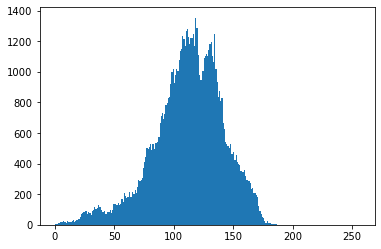

In [36]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("C:/Users/pasindu/Music/in/fuck.jpg",0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [37]:
#ridge filter....
#image = cv2.imread('C:/Users/pasindu/Music/in/fuck.jpg')
ridge_filter = cv2.ximgproc.RidgeDetectionFilter_create()
ridges = ridge_filter.getRidgeFilteredImage(image)

AttributeError: module 'cv2.cv2' has no attribute 'ximgproc'

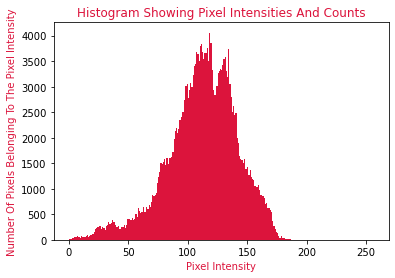

In [38]:
import matplotlib.pyplot as plt
plt.hist(x=image.ravel(), bins=256, range=[0, 256], color='crimson')
plt.title("Histogram Showing Pixel Intensities And Counts", color='crimson')
plt.ylabel("Number Of Pixels Belonging To The Pixel Intensity", color="crimson")
plt.xlabel("Pixel Intensity", color="crimson")
plt.show()


## jaw seperation

original image diamention : (827, 1568, 3)
Lower 380.0 upper413.0
1568
8


<ipython-input-1-efae4fc861f3>:168: RuntimeWarning: overflow encountered in ubyte_scalars
  val = abs(image[x,y]-image[x-1,y])


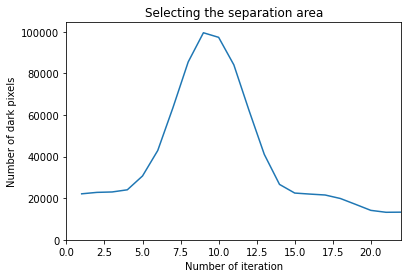

diamention of image 827  1568
diamention of line 827  1568


<function destroyAllWindows>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy
from scipy.optimize import curve_fit
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import openpyxl 
import os
import glob
import pandas as pd

def removeOutliers(arr):
    upper = np.percentile(arr, 65, axis =0)
    lower = np.percentile(arr, 35, axis =0)
    return lower,upper


def jaws():

    #Get hight and width
    height = image.shape[0]
    width = image.shape[1]
    # print (height)
    # print (width)

    numofiterates = int(((height - 400)/20)+1)
    K = [0]*numofiterates
    xaxis = [0]*numofiterates
    iterate = 0

    for x in range(100,height-300,20):
        # print (iterate)
        xaxis[iterate] = iterate + 1          
                
        for a in range(x,x+100,1):
            for i in range(width):
                val = image[a,i]
                if(i < (width/2)):
                    original[a,i] = [0, 255, 255]

                    if(val < 100):
                        # image[a+1,i] = 0
                        K[iterate] += 1

                    if(i%5 == 0):
                        a = a + 1    
                else:
                    original[a,i] = [0, 0, 255]
                    if(val < 100):
                        # image[a+1,i] = 0
                        K[iterate] += 1

                    if(i%5 == 0):
                        a = a - 1

        iterate+=1               

    # for a in range(0,height-200,100):
    #         for i in range(width):
    #             if(i < (width/2)):
    #                 for x in range(a,a+100,2):
    #                     original[x,i] = [0, 255, 255]
    #             else:
    #                 for x in range(a+100,a,-2): 
    #                     original[x,i] = [0, 0, 255]

    ind = K.index(max(K))
    x = [0]*max(K)
    y = [0]*max(K) 
    count = 0
    row1 = 1
    row2 = 1
    column = 1
    sums = []

    
    for i in range((100+(ind*20)),(100+(ind*20))+100,1):
        for j in range(width):
            val = image[i,j]
            if(j < (width/2)):
                if(val < 100):
                    image[i,j] = 0
                    x[count] = j
                    y[count] = i
                    count+=1
                if(j%5 == 0):
                    i = i + 1

            else: 
                if(val < 100):
                    image[i,j] = 0
                    x[count] = j
                    y[count] = i
                        
                    count+=1
                if(j%5 == 0):
                    i = i - 1  
                    
    selectedpoints = []
    widthpos = []
    selected = []

    for i in range(width):
        linesum = []
        for cot in range(count):
            if(x[cot] == i):
                linesum.append(y[cot])
        if(len(linesum)>0):
            # line[linesum[int(len(linesum)/2)],i] = [0 , 0 , 255 ]
            selectedpoints.append(linesum[int(len(linesum)/2)])
            widthpos.append(i)
            selected.append(i)
        else:
            selectedpoints.append(selectedpoints[i-1])
            widthpos.append(i)
    # print(selectedpoints)
    
    arr = np.array(selectedpoints)
    previous = arr[0]
    lower,upper = removeOutliers(selectedpoints)
    # print("width "+str(width))
    # print("arr length "+str(len(arr)))
    # print("selectedpoints length "+str(len(selectedpoints)))
    # print("widthpos length "+str(len(widthpos)))
    print("Lower "+str(lower)+" upper"+str(upper))

    # for x in range(width-1):
    #     if(arr[x]<lower):
    #         arr[x] == lower
    #     elif(arr[x]>upper):
    #         arr[x] == upper  

    linepoints = []

    for x in range(width):

        # line[selectedpoints[x],widthpos[x]] = [255 , 0 , 0 ]
        if(abs(previous - arr[x]) > 4):
            if(x < (width/2)):
                if(widthpos[x]%5 == 0):
                    previous = previous + 1
                line[previous,widthpos[x]] = [0 , 255 , 0 ]
                line[previous+1,widthpos[x]] = [0 , 255 , 0 ]
                line[previous-1,widthpos[x]] = [0 , 255 , 0 ]
                selectedpoints[x] = 0
            else:
                if(widthpos[x]%5 == 0):
                    previous = previous - 1
                line[previous,widthpos[x]] = [0 , 255 , 0 ]
                line[previous+1,widthpos[x]] = [0 , 255 , 0 ]
                line[previous-1,widthpos[x]] = [0 , 255 , 0 ]
                selectedpoints[x] = 0
            linepoints.append(previous)
            previous = arr[x] 
        else:
            previous = arr[x]
            line[arr[x],widthpos[x]] = [0 , 0 , 255 ]
            line[arr[x]+1,widthpos[x]] = [0 , 0 , 255 ]
            line[arr[x]-1,widthpos[x]] = [0 , 0 , 255 ] 
            linepoints.append(arr[x])  

    print(str(len(linepoints)))

    for y in range(width):
        for x in range(linepoints[y],100,-1):
            val = abs(image[x,y]-image[x-1,y])
            if(val > 100):
                line[x,y] = [255 , 0 , 0 ]
                line[x+1,y] = [255 , 0 , 0 ]
                line[x-1,y] = [255 , 0 , 0 ]
                break
                


    # for x in range(len(widthpos)-1):
    #     if(abs(arr[x+1] - arr[x]) > 5):
    #         selectedpoints[x] = 0
    #     else:
    #        line[selectedpoints[x],widthpos[x]] = [0 , 255 , 0 ]            


    # for i in range(width):
    #     print(len(sums[i]))
        # if(len(sums[i])>0):
        #     mid = int(len(sums[i])/2)
        #     image[sums[i][mid],i] = 255

    # # plt.axis([0, width, 0, height])
    # plt.title('selected points') 
    # plt.imshow(image, extent=[0, width, 0, height])
    # plt.plot(x, y)
    # # plt.show()
        

    print(ind)

    ymax = int(max(K)) + 5000
    plt.axis([0, numofiterates, 0, ymax])
    plt.title('Selecting the separation area') 
    plt.xlabel('Number of iteration')
    plt.ylabel('Number of dark pixels')
    # plt.imshow(image, extent=[0, width, 0, height])
    plt.plot(xaxis, K)
    plt.show()

    # cv2.namedWindow('Original',0)
    # cv2.resizeWindow('Original', width*2, height*2)
    # cv2.imshow('Original', original)
    # directory = r'E:\Level 4\Dental\VS\FYP\line'
    # os.chdir(directory) 

    # filename = str(img)
    # # # print(filename)
    # cv2.imwrite(filename, line)  

    # directory = r'E:\Level 4\Dental\VS\FYP\Enhanced'
    # os.chdir(directory) 

    cv2.namedWindow('Image',0)
    cv2.resizeWindow('Image', width*2, height*2)
    cv2.imshow('Image', image)
    cv2.imwrite('C:/Users/pasindu/Music/out/33.jpg', image)
    cv2.waitKey(0) 
    print('diamention of image '+str(image.shape[0])+ "  " + str(image.shape[1]))

    cv2.namedWindow('Line',0)
    cv2.resizeWindow('Line', width, height)
    cv2.imshow('Line', line)
    cv2.imwrite('C:/Users/pasindu/Music/out/line.jpg', line)
    cv2.waitKey(0)
    print('diamention of line '+str(line.shape[0])+ "  "+ str(line.shape[1]))

if __name__ == '__main__':
    #C:\Users\pasindu\Music\out
    directory = r'C:\Users\pasindu\Downloads\Music\Final year project'
    os.chdir(directory)
    # Read image
    original = cv2.imread('D-501-18_34Y_M.jpg')
    print('original image diamention :',original.shape)
    
    ###
    #success, original,image = cap.read()
    
    ####
    line = original.copy()
    image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    img = image.copy()
    jaws()
    # for img in glob.glob("*.jpg"):
    #     print (img)
    #     # Read image
    #     original = cv2.imread(img)
    #     line = original.copy()
    #     image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    #     jaws()

cv2.destroyAllWindows